In [1]:
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from datetime import datetime
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import time as time
import fileinput
import itertools
from scipy.stats import norm
from scipy.optimize import curve_fit #look into how this works--it is important to understand/properly use it

In [2]:

#Config 5

# path = "../Data_ExcelAcquisition/Configuration_5/ScintUp1100_ScintDn1250_TPCPMT1350_NoDrift/"#tot_evt = 200
#path = "../Data_ExcelAcquisition/Configuration_5/ScintUp1100_ScintDn1250_TPCPMT1350_NoDrift_ii/"#tot_evt = 1000
#path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1680_ThGUp1460_ThGDnGND_PMesh400_TPC1350_ii/"#tot_evt = 1000
#path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1680_ThGUp1460_ThGDnGND_PMesh400_TPC1350_iii/"#tot_evt = 917
# path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1680_ThGUp1460_ThGDnGND_PMesh400_TPC1350_iv/"#6387
#path = "../Data_ExcelAcquisition/Configuration_5/C7600_LSF1680_ThGUp1460_ThGDnGND_PMesh400_TPC1350_2lhFlow/"#1000 event

#Config 6
#path="../Data_ExcelAcquisition/Configuration_6/C8500_LSF1720_ThGUp1460_ThGDnGND_PMesh400_TPC1350/" #tot_evt = 9000

#Config 7

#path ="../Data_ExcelAcquisition/Configuration_7/C8500_LSF1720_ThGUp1460_ThGDnGND_PMesh400_TPC1350/"#tot_evt = 10000
#path = "../Data_ExcelAcquisition/Configuration_7/C7500_LSF1620_ThGUp1400_ThGDnGND_PMesh400_TPC1350/"#tot_evt = 870
#path = "../Data_ExcelAcquisition/Configuration_7/C7500_LSF1620_ThGUp400_ThGDnGND_PMesh400_TPC1350/"#tot-evt = 553
path = "../Data_ExcelAcquisition/Configuration_7/C3500_LSF1480_ThGUp1400_ThGDnGND_PMesh400_TPC1350/"#tot_evt = 959
#path ="../Data_ExcelAcquisition/Configuration_7/C3500_LSF1480_ThGUp1400_ThGDnGND_PMesh400_TPC1350_ii/"#tot_evt = 5116
in_evt = 0
tot_evt = 959
volt_lim = -0.009
sat_lim = 0.01
Amp_good_int = 0.00007 
Max_good_amp = 0.5#parameter to check for sparks
trig_offset =  0. 
baseline_offset = -0.018#studied with the Baseline shift code



filetype = 0
f = path+"result.txt"
#f = open(path+"result.txt",'r')


In [3]:
#parametersfor calculating the integrals
drift_exp = 40e-6# drift time expectation in seconds
int_UpLim = trig_offset + 32e-6 # the drift time (or some other related time)
int_LowLim = trig_offset - 34e-6 # the drift time (or some other related time)
dt = 100e-6*10e-3# length of acq window * sampling rate
bef_offset = 5e-6
Impedance = 50#50Ohms



#--------------------------
#function to estimate the number of photons hitting the photcathode
#--------------------------

def photons_detected(charge_measured):
    ampl = 3
    gain = 2.5e6 # gain estimated for 1350V
    qe = 0.25 #quantum efficiency of the pmt
    col_eff = 0.8 # colection efficiency
    R = 50 #ohms imput impedance
    e_ch = 1.6e-19 #coulomb
    dt = 100e-6/10e3 #
    V = 0.05 # same event as before 
    return charge_measured/(ampl*e_ch * gain ) 


#time at the start of program is noted
start = time.time()

ampl_TPC = []
all_ampl_TPC =[]
all_good_evt_flag = []
time_TPC = []
ampl_Scint = []
time_Scint = []
ampl_ScintDn = []
time_ScintDn = []
dum_wf_sum= 0
wf_sum_Scint = []
wf_sum_TPC = []
time_st = []
bin_info=[]
Int_aft = []
Int_bef = []
Int_aft_Fede = []
Int_bef_Fede = []
Int_aft_cut1 = []
Int_bef_cut1 = []
Max_aft = []
Max_aft_time = []
Max_bef_time = []
Max_bef = []
sat_evt = []
sat_evt2 = []
good_evt = []
good_evt_bef = []
evt_no = []
good_evt_flag = []
baseline = []

base_dump = []

for i in range(tot_evt):
    ampl_TPC.append([])    
    time_TPC.append([])
    ampl_Scint.append([])
    time_Scint.append([])
    ampl_ScintDn.append([])
    time_ScintDn.append([])
    Int_bef.append(0)
    Int_aft.append(0)
    Int_bef_Fede.append(0)
    Int_aft_Fede.append(0)
    Max_bef.append(-1)
    Max_aft_time.append(-99)
    Max_bef_time.append(-99)
    Max_aft.append(-1)
    evt_no.append(i)
    baseline.append(0)
    base_dump.append([])

    
with open(f) as file:
    for line in file:
        evt_,ch_,time_,ampl_ = line.split(',')
        if (ch_ == "C1" and int(evt_) < tot_evt): 
            ampl_Scint[int(evt_)].append(float(ampl_))   
            time_Scint[int(evt_)].append(float(time_))
        elif (ch_ == "C2" and int(evt_) < tot_evt): 
            ampl_ScintDn[int(evt_)].append(float(ampl_))   
            time_ScintDn[int(evt_)].append(float(time_))       
        elif (ch_ == "C4" and int(evt_) < tot_evt):
            ampl_TPC[int(evt_)].append(float(ampl_))
            time_TPC[int(evt_)].append(float(time_))

<function matplotlib.pyplot.show(close=None, block=None)>

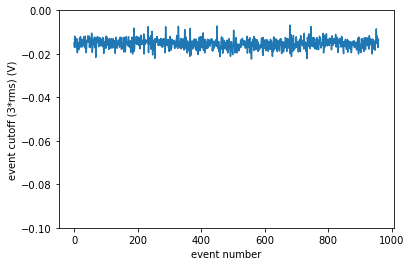

In [4]:
for i in range(len(ampl_TPC)):
    for j in range(0,200):
        baseline[i] += ampl_TPC[i][j]
    baseline[i] = baseline[i]/200


for i in range(tot_evt):
    for j in range(len(ampl_TPC[0])):
        ampl_TPC[i][j] -= baseline[i]

#----------------
#TED:dump all amplitudes in one big amplitude file. do the same for other as well
#----------------

base_events = tot_evt
base_dump_all = []
for i in  range(0,base_events):
    for j in range(len(ampl_TPC[0])):
        base_dump[i].append(ampl_TPC[i][j])   
        base_dump_all.append(ampl_TPC[i][j])
        if (time_TPC[i][j] > trig_offset - 10e-6):
            break



bckgrndchar = np.empty((base_events,3),float) #First column: event mean. Second column: event rms. 
threermsbackgrndchar = np.empty((base_events,2),float) #for saving the same but with 3*rms, the cutoff we plan to use
N_sample=500 #number of data points we wish to sample from the beginning of each event. We can change this number later if wanted.
inv_N_sample = 1/N_sample
for i in  range(0,base_events):
    eventsum=0
    eventrmssum=0
    for j in range(N_sample): #only take the first N_sample data points. 
        eventsum=eventsum+(ampl_TPC[i][j])
        eventrmssum=eventrmssum+(ampl_TPC[i][j])**2
    mean=inv_N_sample*eventsum
    rms=(inv_N_sample)*eventrmssum-(mean*mean)
    
    bckgrndchar[i,0]=mean
    bckgrndchar[i,1]=rms
    bckgrndchar[i,2]=mean - 3*(rms)**0.5
    if (bckgrndchar[i,2]<-0.2): print (i)
cut_val = bckgrndchar[:,2]
plt.plot(bckgrndchar[:,2])
plt.xlabel("event number")
plt.ylabel("event cutoff (3*rms) (V)")
plt.ylim(-0.1,0)
plt.show


#----------
#TED: END
#----------


<function matplotlib.pyplot.show(close=None, block=None)>

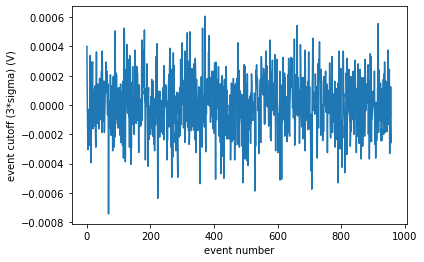

In [5]:
mean_val = bckgrndchar[:,0]
plt.plot(bckgrndchar[:,0])
plt.xlabel("event number")
plt.ylabel("event cutoff (3*sigma) (V)")
plt.show

In [6]:

   
    
for i in range(len(ampl_TPC[0])):
    wf_sum_Scint.append(0)
    wf_sum_TPC.append(0)

    


trigger_level = -0.017#volts
   
norm_bef = 0
norm_aft = 0 
norm_bef_Rob = 0
norm_aft_Rob = 0 
for j in range(len(ampl_TPC[0])):
      if (time_TPC[0][j]<trig_offset): 
            norm_bef = norm_bef+1
            if (trig_offset - drift_exp - bef_offset < time_TPC[0][j] and time_TPC[0][j]< trig_offset - bef_offset ): norm_bef_Rob = norm_bef_Rob+1
      elif( time_TPC[0][j] > trig_offset):
            norm_aft = norm_aft+1 
            if (trig_offset  < time_TPC[0][j] and time_TPC[0][j]< trig_offset +drift_exp ):norm_aft_Rob = norm_aft_Rob+1
            
#    wf_sum_Scint.append(dum_wf_sum) 
#    wf_sum_TPC.append(dum_wf_sum_TPC)    
#    time_st.append(time_Scint[0][i])

fake_trigger = 0
good_trigger = 0
Max_aft_cut_idx = []
Int_aft_good = []


#--------------------
#INTERGRALS before and after the trigger offset 
#--------------------

for i in  range(in_evt,len(ampl_TPC)):
    for j in range(len(ampl_TPC[0])):
        if (time_TPC[i][j]<trig_offset): 
            Int_bef_Fede[i]+=abs(ampl_TPC[i][j])/norm_bef
            if (trig_offset - drift_exp - bef_offset < time_TPC[i][j] and time_TPC[i][j]< trig_offset - bef_offset and ampl_TPC[i][j] < cut_val[i] ): Int_bef[i]+=abs(ampl_TPC[i][j]) * 2*dt/(2*Impedance)
            if( Max_bef[i] < abs(ampl_TPC[i][j]) ): 
                Max_bef[i] = abs(ampl_TPC[i][j])
                Max_bef_time[i] = time_TPC[i][j]
        elif (time_TPC[i][j]>trig_offset):
            Int_aft_Fede[i]+=abs(ampl_TPC[i][j])/norm_aft
            if (trig_offset  < time_TPC[i][j] and time_TPC[i][j]< trig_offset +drift_exp and ampl_TPC[i][j] < cut_val[i] ):Int_aft[i]+=abs(ampl_TPC[i][j]) * 2*dt/(2*Impedance)
            if( Max_aft[i] < abs(ampl_TPC[i][j]) ):
                Max_aft[i] = abs(ampl_TPC[i][j])
                Max_aft_time[i] = time_TPC[i][j]
    if (Max_aft[i] > 0.04): 
         Max_aft_cut_idx.append(i)
#          print (" max = ",  Max_aft[i], "at time: ", Max_aft_time[i]," at event: ", i )




#--------------------
#determine which events are saturated and store them in sat_evt list---- FEDERICO WAY
#--------------------
for i in range(in_evt,len(evt_no)):
    if (Int_aft_Fede[i] > sat_lim): #0.002 in Federio's initial code. 0.2 with the data using the amplifier
#        print ("method 1", evt_no[i], Int_aft[i])
        sat_evt.append(evt_no[i])
    else: 
        if( Int_aft_Fede[i] > Amp_good_int and  Max_aft[i] < Max_good_amp ):
#            print ("Good trigger ", evt_no[i], Int_aft[i])
             good_evt.append(evt_no[i])
        
        if( Int_bef_Fede[i] > Amp_good_int and  Max_bef[i] < Max_good_amp ):
#            print ("Good trigger before ", evt_no[i], Int_bef[i])
             good_evt_bef.append(evt_no[i])
             
        
#-------------------
#Determine which events are saturated: ROBERT WAY (i.e. just look at the max value after trigger)
#-------------------
for i in range(in_evt,len(evt_no)):
    if (  Max_aft[i] > Max_good_amp ):
        good_evt_flag.append("Spark Event")
    else:
        good_evt_flag.append("Good Event")
        Int_aft_good.append(Int_aft[i])

        #-----------------
#Cross check if Federico's method yields the same results as Robert's method: 
for i in range(len(sat_evt)):
    if (good_evt_flag[sat_evt[i]] == True): 
        print("!!!!! Ways of finding saturating events contradict each other !!!!!")
        break
        
time_st = time_Scint[0] 


big_ampl_bef_all = []
big_ampl_aft_all = []
big_ampl_bef_time_all = []
big_ampl_aft_time_all = []
big_ampl_bef = []
big_ampl_aft = []
big_ampl_bef_time = []
big_ampl_aft_time = []



#----------------
#dump all amplitudes in one big amplitude file. do the same for other as well
#----------------
for i in  range(in_evt,len(ampl_TPC)):
    big_ampl_bef.append([])
    big_ampl_aft.append([])
    big_ampl_bef_time.append([])
    big_ampl_aft_time.append([])
    for j in range(len(ampl_TPC[0])):
        all_ampl_TPC.append(ampl_TPC[i][j])
        all_good_evt_flag.append(good_evt_flag[i])
        if (good_evt_flag[i]=="Good Event"):
            if(time_TPC[i][j]<trig_offset): 
                if (ampl_TPC[i][j] < cut_val[i] ):
                    big_ampl_bef[i].append(ampl_TPC[i][j])
                    big_ampl_bef_time[i].append(time_TPC[i][j])
                    big_ampl_bef_all.append(ampl_TPC[i][j])
                    big_ampl_bef_time_all.append(time_TPC[i][j])
            elif(time_TPC[i][j]>trig_offset):
                if (ampl_TPC[i][j] < cut_val[i] ):
                    big_ampl_aft[i].append(ampl_TPC[i][j])
                    big_ampl_aft_time[i].append(time_TPC[i][j])
                    big_ampl_aft_all.append(ampl_TPC[i][j])
                    big_ampl_aft_time_all.append(time_TPC[i][j])


                    
                    
print ("good trigger events: ", len(good_evt), "out of ",len(ampl_TPC))
print ("good before trigger events: ", len(good_evt_bef), "out of ",len(ampl_TPC))
print ("saturation trigger events: ", len(sat_evt), "out of ",len(ampl_TPC))
print ("saturation trigger events Robert: ", good_evt_flag.count("Spark Event"), "out of ",len(ampl_TPC))
print ("max aft cut events: ", len(Max_aft_cut_idx), "out of ",len(ampl_TPC))


good trigger events:  956 out of  959
good before trigger events:  953 out of  959
saturation trigger events:  3 out of  959
saturation trigger events Robert:  2 out of  959
max aft cut events:  357 out of  959


In [7]:


#-------------------
#CUT 1
#-------------------

cut1_idx = []
for i in range(len(evt_no)):
    if (  Max_aft[i] > abs(cut_val[i]) and good_evt_flag[i] == 'Good Event'):
        cut1_idx.append(i) 


In [8]:

#plt.hist(all_ampl_TPC, bins = 50) denisity, percent, probability, count
#-------------------
#CUT 2
#-------------------
cut2_idx = []
for i in range(len(evt_no)):
    if (  Max_bef[i] > abs(cut_val[i]) and good_evt_flag[i] == 'Good Event'):
        cut2_idx.append(i) 

920


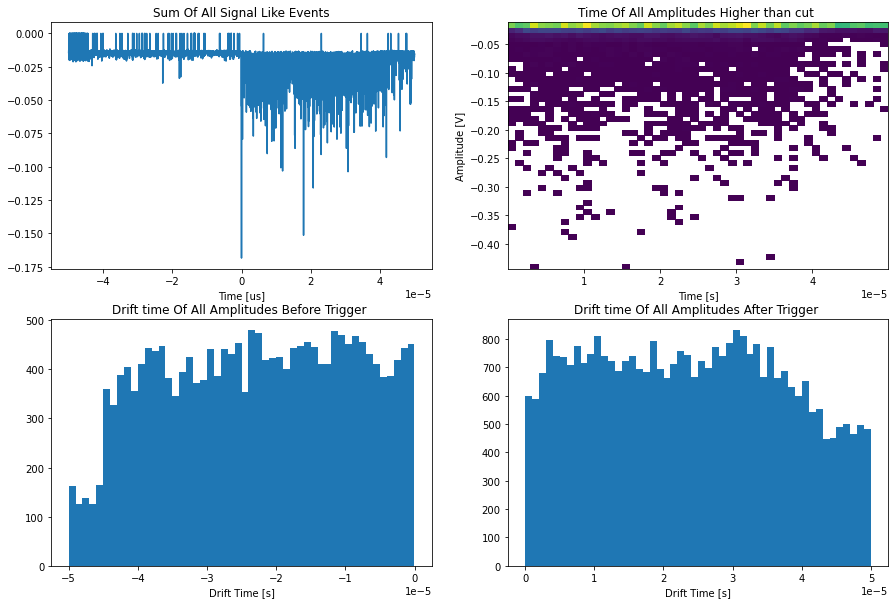

In [9]:
#-------------------------------------
#plot events for "cut1" after the trigger
#-------------------------------------
Int_bef_cut1 = []
Int_aft_cut1 = []
for i in range(len(cut1_idx)):
    Int_bef_cut1.append(0)
    Int_aft_cut1.append(0)
    

print (len(cut1_idx))


sig_trig_time = []
max_aft_cut1 = []
int_bef_cut1_dump = []
int_aft_cut1_dump = []

#here I store all the integrals passing the cut1 conditions (to have at least one amplitude higher than 0.02 after trigeer)
for i in range(len(cut1_idx)):
    sig_trig_time.append((Max_aft_time[cut1_idx[i]]-trig_offset)*1e6) 
    max_aft_cut1.append(Max_aft[cut1_idx[i]]) 
    int_bef_cut1_dump.append(Int_bef[cut1_idx[i]])
    int_aft_cut1_dump.append(Int_aft[cut1_idx[i]])
# plt.hist(sig_trig_time) 



ampl_sum = []
dum_count = []
for i in range(len(ampl_TPC[1])):
    ampl_sum.append(0)
    dum_count.append(0)

for i in range(len(cut1_idx)):   
    
    for j in range(len(ampl_TPC[cut1_idx[i]])):
        if (ampl_TPC[cut1_idx[i]][j] < cut_val[cut1_idx[i]]):
            ampl_sum[j]+=ampl_TPC[cut1_idx[i]][j]
            dum_count[j] = dum_count[j]+1

for i in range(len(ampl_sum)):
    if (dum_count[i]!= 0): 
        ampl_sum[i] = ampl_sum[i]/dum_count[i]
    else: ampl_sum[i] = ampl_sum[i]/1

fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)
axes[0,0].plot(time_TPC[1],ampl_sum, color = 'C0')
axes[0,0].set(title = "Sum Of All Signal Like Events",xlabel = "Time [us]")




axes[1,0].hist(big_ampl_bef_time_all,  bins=50 )
axes[1,0].set(title = "Drift time Of All Amplitudes Before Trigger ",xlabel = "Drift Time [s]" )
axes[1,1].hist(big_ampl_aft_time_all,  bins=50 )
axes[1,1].set(title = "Drift time Of All Amplitudes After Trigger ",xlabel = "Drift Time [s]" )

axes[0,1].hist2d(big_ampl_aft_time_all,big_ampl_aft_all, bins=50, cmin =1)
axes[0,1].set(title = "Time Of All Amplitudes Higher than cut ",xlabel = "Time [s]", ylabel = "Amplitude [V]")

fig.savefig(path+"wf_sum.pdf")  


       

Text(0.05, 0.95, '$Entries=920$\n$\\mu=9.17e-09$\n$\\sigma=2.88e-08$')

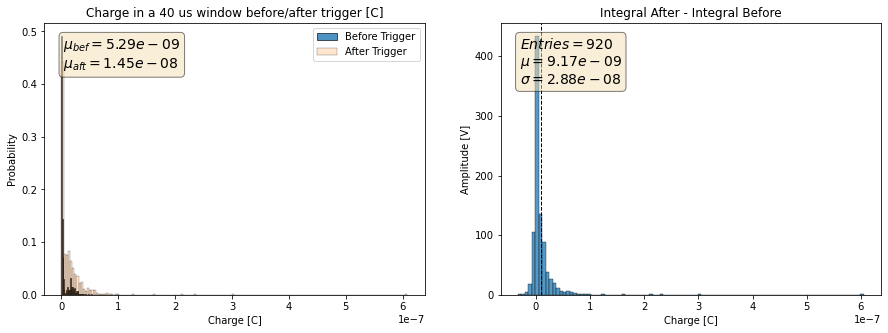

In [10]:
#----------------------------------------
#Integral Analysis
#----------------------------------------




fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
bins = []
bin_no = 20
bin_min = -2.2e-12
bin_max = 10e-12
increment = (bin_max - bin_min)/bin_no
for i in range(bin_no):
    bins.append(bin_min + i*increment)
    if ((bin_min + i*increment) > bin_max): break

fig0 = sns.histplot(int_bef_cut1_dump,ax = axes[0] ,color = 'C0',  alpha = 0.8, stat= 'probability',label = "Before Trigger")
axes[0].set(title = "Charge in a 40 us window before/after trigger [C]",xlabel = "Charge [C]")
fig1 = sns.histplot(int_aft_cut1_dump, ax=axes[0] ,color = 'C1',  alpha = 0.2, stat= 'probability', label = "After Trigger")
axes[0].legend()



dum_list = []
zip_object = zip(int_aft_cut1_dump, int_bef_cut1_dump)
for int_aft_cut1_dump_i, int_bef_cut1_dump_i in zip_object:
    dum_list.append(int_aft_cut1_dump_i-int_bef_cut1_dump_i)

fig2 = sns.histplot(dum_list, ax = axes[1], bins=100 )
axes[1].set(title = "Integral After - Integral Before",xlabel = "Charge [C]", ylabel = "Amplitude [V]")

plt.axvline(sts.mean(dum_list), color='k', linestyle='dashed', linewidth=1)



textstr0 = '\n'.join((
    r'$\mu_{bef}=%.2e$' % (sts.mean(int_bef_cut1_dump), ),
    r'$\mu_{aft}=%.2e$' % (sts.mean(int_aft_cut1_dump), )     ))

textstr1 = '\n'.join((
    r'$Entries=%.f$' % (len(dum_list), ),    
    r'$\mu=%.2e$' % (sts.mean(dum_list), ),
    r'$\sigma=%.2e$' % (sts.stdev(dum_list), )     ))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
axes[0].text(0.05, 0.95, textstr0, transform=axes[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

axes[1].text(0.05, 0.95, textstr1, transform=axes[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)







amplitude is:  -0.02681250005499999 time is 7.4e-07
amplitude is:  -0.02681250005499999 time is 2.18e-06
amplitude is:  -0.02056250005499999 time is 2.9e-06
amplitude is:  -0.30181246005499995 time is 4.1e-06
amplitude is:  -0.033062500055 time is 6.3e-06
amplitude is:  -0.308062560055 time is 6.48e-06
amplitude is:  -0.02681250005499999 time is 6.77e-06
amplitude is:  -0.170562460055 time is 8.37e-06
amplitude is:  -0.033062500055 time is 8.66e-06
amplitude is:  -0.10806246005499999 time is 8.95e-06
amplitude is:  -0.02681250005499999 time is 9.11e-06
amplitude is:  -0.02056250005499999 time is 1.71e-05
amplitude is:  -0.02056250005499999 time is 3.821e-05
amplitude is:  -0.02056250005499999 time is 4.142e-05
int before:  0 int after 2.2471248814300007e-08  signal integral  2.2882498815400008e-08 cut at  -0.01707379738973226
number of photons detected  19068.74901283334


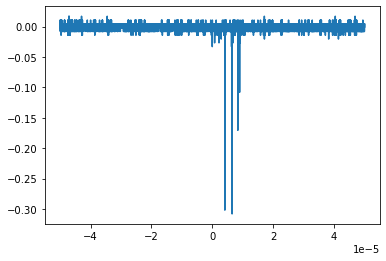

In [11]:
# #-------------------------------------------------------------------
# #Investigates of the event one by one, zooming in on the spikes. 
# #-------------------------------------------------------------------
plot_no = 15
temp_store = 0
plt.plot(time_TPC[cut1_idx[plot_no]],ampl_TPC[cut1_idx[plot_no]],  color = 'C0',label = "TPC")
# plt.xlim(0.4e-5,0.45e-5)


for j in range(len(big_ampl_aft[cut1_idx[plot_no]])):
    print ("amplitude is: ", big_ampl_aft[cut1_idx[plot_no]][j],"time is", big_ampl_aft_time[cut1_idx[plot_no]][j])
    temp_store += abs(big_ampl_aft[cut1_idx[plot_no]][j] )*2*dt/(2*Impedance)
print ("int before: ", Int_bef[cut1_idx[plot_no]],"int after", Int_aft[cut1_idx[plot_no]], " signal integral ", temp_store, "cut at ", cut_val[cut1_idx[plot_no]])
print ("number of photons detected ", photons_detected(temp_store))





In [12]:
# #-------------------------------------------------------------------
# #this analysis shows only plots with variables obtained "per-event". Like the maximum per event vs event number etc...
# #-------------------------------------------------------------------


# d = { 'evt_no':evt_no, 'Max_aft':Max_aft, 'Max_aft_time':Max_aft_time,'Max_bef':Max_bef, 'Max_bef_time':Max_bef_time,'Int_bef':Int_bef ,'Int_aft':Int_aft,'good_evt_flag':good_evt_flag}
# df = pd.DataFrame(d)
# fig, axes = plt.subplots(5, 2, figsize=(15, 30), sharey=False)


# fig0 = sns.histplot(df,ax=axes[0,0], x="Int_bef" ,hue="good_evt_flag",palette=["C1", "C0"],bins = 100 ).set(yscale = 'log')
# axes[0,0].set(xlabel = 'Waveform sum before trigger [mV]')

# fig0b = sns.histplot(df,ax=axes[0,1], x="Int_aft" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 1000).set(yscale = 'log')
# axes[0,1].set(xlabel = 'Waveform sum after trigger [mV]')

# # fig1 = sns.histplot(df, ax = axes[1,0], x="Max_bef" , hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# # axes[1,0].set(xlabel = 'Max Amplitude Bef Trigger [mV]')

# # fig1b = sns.histplot(df, ax = axes[1,1], x="Max_aft" , hue="good_evt_flag", palette=["C1", "C0"],bins = 50)
# # axes[1,1].set(xlabel = 'Max Amplitude After Trigger [mV]')

# # fig2 = sns.histplot(df, ax = axes[2,0], x="Max_bef_time" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# # axes[2,0].set(xlabel = 'Time at Which Maximum Occurs Before Trigger [s]')

# # fig2b = sns.histplot(df, ax = axes[2,1], x="Max_aft_time" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# # axes[2,1].set(xlabel = 'Time at Which Maximum Occurs After Trigger [s]')

# fig3 = sns.histplot( df,ax=axes[3,0], x="evt_no", y = "Int_bef" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# axes[3,0].set(ylabel = 'Integral bef trigger [mV]', xlabel = 'Event Number', ylim = (0,0.05))

# fig3b = sns.histplot(data = df,ax=axes[3,1], x="evt_no", y = "Int_aft" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# axes[3,1].set(ylabel = 'Integral after trigger [mV]', xlabel = 'Event Number')

# fig4b = sns.histplot(df,ax=axes[4,0], x="Max_bef_time", y = "Max_bef" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# axes[4,0].set(xlabel = 'Time [s] ',ylabel = 'Max Amplitude Before Trigger [mV]')

# fig4b = sns.histplot(df,ax=axes[4,1], x="Max_aft_time", y = "Max_aft" ,hue="good_evt_flag",palette=["C1", "C0"], bins = 50)
# axes[4,1].set(xlabel = 'Time [s] ',ylabel = 'Max Amplitude After Trigger [mV]')

# fig.savefig(path+"seaborn_integrals.pdf")


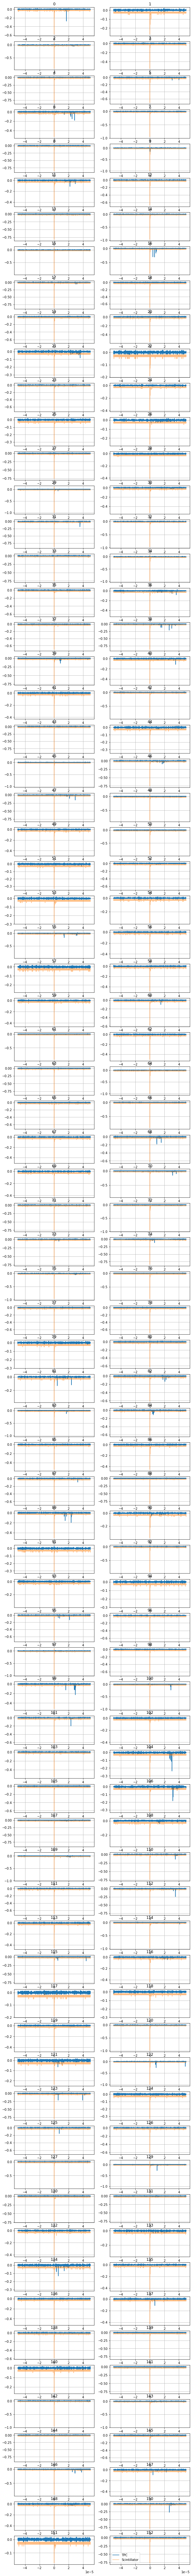

After Trigger
There are 920 / 959 signal like events after trigger. Including Spark Events. Cut > cut_val 
There are 920 / 957 signal like events after trigger. Just Clean Events. Cut > cut_val
Ratio of 96.1337513061651 %


In [13]:
#plot events for "cut1" after the trigger
total_plots = 150
#sns C0 is blue and C1 is orange



if( total_plots > len(cut1_idx)): total_plots = len(cut1_idx)

plt.figure(figsize=(10,total_plots*2))

for i in range(0,total_plots):
            ax = plt.subplot(total_plots,2,i+1)
            plt.plot(time_TPC[cut1_idx[i]],ampl_TPC[cut1_idx[i]], color = 'C0',label = "TPC")
            plt.plot(time_TPC[cut1_idx[i]],ampl_Scint[cut1_idx[i]],  color = 'C1',label = "Scintillator" ,alpha = 0.5)
            #plt.xlim([4.90e-6,5.3e-6])
#             plt.plot(time_ScintDn[cut1_idx[i]],ampl_Scint[cut1_idx[i]], alpha = 0.8)
#             plt.plot(time_ScintDn[cut1_idx[i]],ampl_ScintDn[cut1_idx[i]], alpha = 0.8)
            ax.title.set_text(cut1_idx[i])
            ax.grid()
         
plt.legend()
        
plt.savefig(path+"good_events_afterTrig.pdf")            
plt.show()
print("After Trigger")
print ("There are", len(cut1_idx),"/", tot_evt, "signal like events after trigger. Including Spark Events. Cut > cut_val ")
print ("There are", len(cut1_idx),"/", good_evt_flag.count("Good Event"), "signal like events after trigger. Just Clean Events. Cut > cut_val" )
print("Ratio of",100*len(cut1_idx)/ good_evt_flag.count("Good Event"),"%")







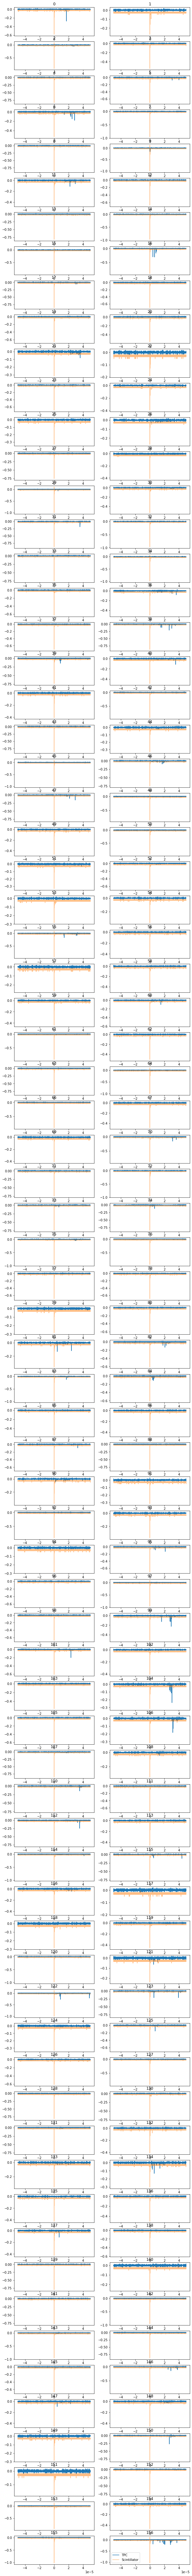

Before Trigger
There are 881 / 959 signal like events before trigger. Cut > cut_val
There are 881 / 957 signal like events before trigger. Just Clean Events. Cut > cut_val
Ratio of 92.05851619644723 %


In [14]:
#plot events for "cut2" after the trigger
total_plots = 150

if( total_plots > len(cut2_idx)): total_plots = len(cut2_idx)

plt.figure(figsize=(10,total_plots*2))


for i in range(0,total_plots):
            ax = plt.subplot(total_plots,2,i+1)
            plt.plot(time_ScintDn[cut2_idx[i]],ampl_TPC[cut2_idx[i]], color = 'C0', label = "TPC")
            plt.plot(time_TPC[cut2_idx[i]],ampl_Scint[cut2_idx[i]], color = 'C1',alpha = 0.5, label = "Scintillator")
            ax.title.set_text(cut2_idx[i])
            #print(cut2_idx[i])
plt.legend()
plt.savefig(path+"good_events_beforeTrig.pdf")            
plt.show()


print("Before Trigger")
print ("There are", len(cut2_idx),"/", tot_evt, "signal like events before trigger. Cut > cut_val"  )
print ("There are", len(cut2_idx),"/", good_evt_flag.count("Good Event"), "signal like events before trigger. Just Clean Events. Cut > cut_val" )
print("Ratio of",100*len(cut2_idx)/ good_evt_flag.count("Good Event"),"%")





9590000    sadasdasd  9590000


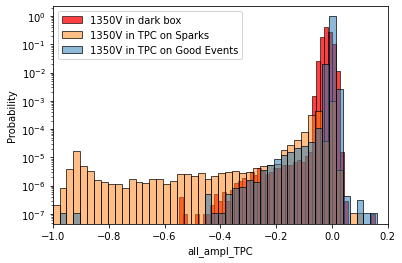

In [15]:
path_hama = "../Data_ExcelAcquisition/HamamatsuAna/dark_TPC_tr238_V1350_Amp2_5/"


in_evt = 0
tot_evt_hama = 1000       # 200
volt_lim = -0.009
sat_lim = 0.03


filetype = 0
f_hama = open(path_hama+"result.txt",'r')

ampl_hama = []
all_ampl_hama = []
time_hama = []

for i in range(tot_evt_hama):
    ampl_hama.append([])    
    time_hama.append([])


#read data and store them in a list of list
dis = f_hama.readlines()
f_hama.close()
for i in dis:
        evt_,ch_,time_,ampl_ = i.split(',')
        if (ch_ == "C4" and int(evt_) < tot_evt_hama):
                ampl_hama[int(evt_)].append(float(ampl_))
                time_hama[int(evt_)].append(float(time_))
                

for i in range(len(ampl_hama)):
    for j in range (len(ampl_hama[i])):
        all_ampl_hama.append(ampl_hama[i][j])
   
print (len(all_ampl_TPC), "   sadasdasd ", len (all_good_evt_flag))

d2 = { 'all_ampl_TPC':all_ampl_TPC, 'all_good_evt_flag':all_good_evt_flag}
df2 = pd.DataFrame(d2)

ax1 = sns.histplot(all_ampl_hama, bins = 50, stat = 'probability' , color  = 'red', legend = 'True', label = '1350V dark box').set(xlim = (-1,0.2), yscale = 'log')
#ax1 = sns.histplot(all_ampl_TPC, bins = 250, stat = 'count', alpha = 0.3).set( yscale = 'log', label = '1350V TPC On')

sns.histplot(df2, x="all_ampl_TPC" ,hue="all_good_evt_flag", bins = 50, stat = 'probability' ).set(yscale = 'log')
#ax1.set(xlabel = 'Integral before trigger [mV]', xlim = (0.015,0.029))

plt.legend(labels = ['1350V in dark box','1350V in TPC on Sparks','1350V in TPC on Good Events'])
# handles = legend.legendHandles
# legend.remove()
# ax1.legend(handles, ['dep-', 'ind-', 'ind+', 'dep+'], title='Stat.ind.')
# plt.show()


In [16]:
#------------------------------------
#conversion from amplitude to photon count 
#------------------------------------
#  PAY ATENTION AT THE dt VARIABLE AS THIS CHANGE DEPENDING ON THE SAMPLING RATE
#  THE VOLTAGE MEASURE ON THE SCOPE IS: V
gain = 2.5e6 # gain estimated for 1350V
qe = 0.25 #quantum efficiency of the pmt
col_eff = 0.8 # colection efficiency
R = 50 #ohms imput impedance
e_ch = 1.6e-19 #coulomb
dt = 100e-6/10e3 #
V = 0.05 # same event as before 


ampl = 3 # the amplifier settings
C = (V/ (ampl * R)) *dt
C/e_ch #number of electrons produced after last dynode
C/(e_ch * gain) # number of electrons produced in the first dynode
C/(e_ch * gain * col_eff) # number of photoelectrons reaching the first dynode
C/(e_ch * gain * col_eff* qe) #number of photons hitting the photocathode

print ("the number of electrons produced at first dynode " ,C/(e_ch * gain ),", corresponding to a measured voltage of ", V)
print ("the number of photons hitting the photocathode is " ,C/(e_ch * gain  *col_eff *qe), ", corresponding to a measured voltage of ", V)
print ("the voltage corresponding to a thermal emission is: ", 1e3*e_ch*gain * ampl * R /dt, "mV")



    


#time at the end of program execution is noted
end = time.time()

#total time taken to print the file
print("Execution time in minutes: ",(end - start)/60)


the number of electrons produced at first dynode  8.333333333333336 , corresponding to a measured voltage of  0.05
the number of photons hitting the photocathode is  41.66666666666667 , corresponding to a measured voltage of  0.05
the voltage corresponding to a thermal emission is:  5.999999999999999 mV
Execution time in minutes:  2.164193054040273
